# Table of Contents
 <p><div class="lev1"><a href="#imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></div><div class="lev1"><a href="#example-match-that-works-currently-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>example match that works currently</a></div><div class="lev3"><a href="#directly-calling-the-waveform-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>directly calling the waveform</a></div><div class="lev3"><a href="#calling-approximant-from-Waveform-class-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>calling approximant from Waveform class</a></div><div class="lev1"><a href="#try-with-phenomP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>try with phenomP</a></div><div class="lev3"><a href="#directly-calling-the-waveform-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>directly calling the waveform</a></div><div class="lev3"><a href="#calling-approximant-from-Waveform-class-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>calling approximant from Waveform class</a></div><div class="lev1"><a href="#try-with-lalsim-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>try with lalsim</a></div><div class="lev2"><a href="#try-and-use-my-match-function-with-lal-waveform-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>try and use my match function with lal waveform</a></div><div class="lev1"><a href="#try-phenom-vs-lal---the-mixed-case-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>try phenom vs lal - the mixed case</a></div><div class="lev1"><a href="#phenom-vs-lal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>phenom vs lal</a></div><div class="lev1"><a href="#double-check-the-phenomD-lal-vs-phenom-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>double check the phenomD lal vs phenom results</a></div><div class="lev1"><a href="#compare-phenom[phenomP,-chip=0]-with-lal[phenomD]-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>compare phenom[phenomP, chip=0] with lal[phenomD]</a></div><div class="lev1"><a href="#compare-phenom[phenomD]-with-lal[phenomP,-chip=0]-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>compare phenom[phenomD] with lal[phenomP, chip=0]</a></div>

# imports

In [1]:
import phenom

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# example match that works currently

### directly calling the waveform

In [4]:
ph1 = phenom.PhenomD(m1=100, m2=10., chi1z=0., f_min=10, delta_f=1./128.)
ph2 = phenom.PhenomD(m1=100, m2=10.1, chi1z=0., f_min=10, delta_f=1./128.)

In [5]:
#generate htilde
ph1.IMRPhenomDGenerateFD()
ph2.IMRPhenomDGenerateFD()

In [6]:
#load psd function
# psd_fun = phenom.read_and_interp_psd_from_txt(phenom.PHENOM_PACKAGE_PATH + '/psd/data/ZERO_DET_high_P.txt')
psd_fun = phenom.read_and_interp_psd_from_txt('/Users/sebastian/git/phenom/phenom' + '/psd/data/ZERO_DET_high_P.txt')

#get instance of Match
match = phenom.Match()

In [7]:
print psd_fun.x[0]
print psd_fun.x[-1]

9.0
8192.0


In [9]:
ph1_wfs = phenom.MakeWaveformSeries(ph1.flist_Hz, ph1.htilde, ph1.htilde)
ph2_wfs = phenom.MakeWaveformSeries(ph2.flist_Hz, ph2.htilde, ph2.htilde)

In [10]:
print "[with psd] match = ", match.match(ph1_wfs, ph2_wfs, fmin=10, fmax=0, psd_fun=psd_fun)

[with psd] match =  0.969064696777


### calling approximant from Waveform class

In [11]:
wf1 = phenom.Waveform(approximant="IMRPhenomD", m1=100, m2=10., chi1z=0., f_min=10, delta_f=1./128.)
wf2 = phenom.Waveform(approximant="IMRPhenomD", m1=100, m2=10.1, chi1z=0., f_min=10, delta_f=1./128.)

In [12]:
wf1_wfs = phenom.MakeWaveformSeries(wf1.flist_Hz, wf1.hptilde, wf1.hctilde)
wf2_wfs = phenom.MakeWaveformSeries(wf2.flist_Hz, wf2.hptilde, wf2.hctilde)

In [13]:
print "[with psd] match = ", match.match(wf1_wfs, wf2_wfs, fmin=10, fmax=0, psd_fun=psd_fun)

[with psd] match =  0.969064696777


# try with phenomP

### directly calling the waveform

In [14]:
php1 = phenom.PhenomP(m1=100, m2=10., chi1z=0.5, f_min=10, delta_f=1./32.)
php2 = phenom.PhenomP(m1=100, m2=10.1, chi1z=0.5, f_min=10, delta_f=1./32.)

In [16]:
php1_wfs = phenom.MakeWaveformSeries(php1.flist_Hz, php1.hp, php1.hc)
php2_wfs = phenom.MakeWaveformSeries(php2.flist_Hz, php2.hp, php2.hc)

In [17]:
print "[with psd] match = {0:.8f}".format(match.match(php1_wfs, php2_wfs, fmin=10, fmax=0, psd_fun=psd_fun))

[with psd] match = 0.94166740


### calling approximant from Waveform class

In [18]:
wf1 = phenom.Waveform(approximant="IMRPhenomPv2_LAL", m1=100, m2=10., chi1z=0.5, f_min=10, delta_f=1./32.)
wf2 = phenom.Waveform(approximant="IMRPhenomPv2_LAL", m1=100, m2=10.1, chi1z=0.5, f_min=10, delta_f=1./32.)

In [19]:
ws1 = phenom.MakeWaveformSeries(wf1.flist_Hz, wf1.hptilde, wf1.hctilde)
ws2 = phenom.MakeWaveformSeries(wf2.flist_Hz, wf2.hptilde, wf2.hctilde)

In [20]:
print "[with psd] match = ", match.match(ws1, ws2, fmin=10, fmax=0, psd_fun=psd_fun)

[with psd] match =  0.941667400813


# try with lalsim

In [21]:
import lal
import lalsimulation as lalsim

In [22]:
def make_lal_wf(m1=10., m2=10., chi1x=0., chi1y=0., chi1z=0., chi2x=0., chi2y=0., chi2z=0.,
                delta_f=1./32., f_min=10., fRef=0., inclination=0.):
    _lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, delta_f, m1*lal.MSUN_SI, m2*lal.MSUN_SI,
                    chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, f_min, 0, fRef, 1e6*phenom.Constants.PC_SI, inclination,
                    0, 0, None, None, -1, -1, lalsim.IMRPhenomPv2)    
    flist = np.arange(_lshp.data.length) * _lshp.deltaF
    lshp = _lshp.data.data
    lshc = _lshc.data.data
    return flist, lshp, lshc

In [23]:
lsf, lshp, lshc = make_lal_wf(m1=100, m2=10., chi1z=0.5, f_min=10, delta_f=1./32.)

In [24]:
lsf_1, lshp_1, lshc_1 = make_lal_wf(m1=100, m2=10.1, chi1z=0.5, f_min=10, delta_f=1./32.)

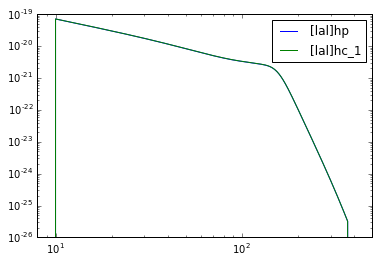

In [25]:
plt.figure()
plt.plot(lsf, np.abs(lshp), label='[lal]hp')
plt.plot(lsf_1, np.abs(lshp_1), label='[lal]hc_1')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlim(8,500);

## try and use my match function with lal waveform

first I need to make it so tat the lal data has the attributes needed by my match function.

In [26]:
lalhp_wfseries = phenom.MakeWaveformSeries(lsf, lshp, lshc)
lalhp_wfseries_1 = phenom.MakeWaveformSeries(lsf_1, lshp_1, lshc_1)

In [27]:
print "[with psd] match = {0:.8f}".format(match.match(lalhp_wfseries, lalhp_wfseries_1, fmin=10, fmax=0, psd_fun=psd_fun))

[with psd] match = 0.94177511


# try phenom vs lal - the mixed case

In [28]:
print "[with psd] match = {0:.8f}".format(match.match(php1_wfs, lalhp_wfseries_1, fmin=10, fmax=0, psd_fun=psd_fun))

[with psd] match = 0.94166738


# phenom vs lal

In [41]:
def match_phenomP_vs_lal(**kwargs):
    
    #generate waveforms
    php1 = phenom.PhenomP(**kwargs)
    lsf, lshp, lshc = make_lal_wf(**kwargs)
    
    #turn into correct format
    php1_wfs = phenom.MakeWaveformSeries(php1.flist_Hz, php1.hp, php1.hc)
    lalhp_wfseries = phenom.MakeWaveformSeries(lsf, lshp, lshc)
    
    result = match.match(php1_wfs, lalhp_wfseries, fmin=10, fmax=0, psd_fun=psd_fun)
    print ""
    print "[with psd] match = {0:.8f}".format(result)
    print "percentage match = {0:.8f}".format(result*100.)
    print "mismatch = {0:.8f}".format(1.-result)
    print "percentage mismatch = {0:.8f}".format((1.-result)*100.)

    result = match.match(php1_wfs, lalhp_wfseries, fmin=10, fmax=0, psd_fun=None)
    print ""
    print "[without psd] match = {0:.8f}".format(result)
    print "percentage match = {0:.8f}".format(result*100.)
    print "mismatch = {0:.8f}".format(1.-result)
    print "percentage mismatch = {0:.8f}".format((1.-result)*100.)

In [42]:
def make_param_dic_PhenP(m1, m2, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z,
                  f_min, fRef, delta_f, inclination):
    input_params = {}
    input_params.update({'m1' : m1})
    input_params.update({'m2' : m2})
    input_params.update({'chi1x' : chi1x})
    input_params.update({'chi1y' : chi1y})
    input_params.update({'chi1z' : chi1z})
    input_params.update({'chi2x' : chi2x})
    input_params.update({'chi2y' : chi2y})
    input_params.update({'chi2z' : chi2z})
    input_params.update({'f_min' : f_min})
    input_params.update({'fRef' : fRef})
    input_params.update({'inclination' : inclination})
    input_params.update({'delta_f' : delta_f})
    return input_params

In [43]:
input_params_PhenP = make_param_dic_PhenP(m1 = 23.1236,
                              m2 = 179.231,
                              chi1x = 0.1234,
                              chi1y = 0.5321,
                              chi1z = 0.2342,
                              chi2x = 0.753,
                              chi2y = 0.124,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/128.,
                              inclination = np.pi / 2.)

In [44]:
match_phenomP_vs_lal(**input_params_PhenP)


[with psd] match = 0.99999995
percentage match = 99.99999526
mismatch = 0.00000005
percentage mismatch = 0.00000474

[without psd] match = 0.99999995
percentage match = 99.99999495
mismatch = 0.00000005
percentage mismatch = 0.00000505


OLD:####The matches are 99.99 percent between phenom and lal versions of phenomP####
NEW!!!:
FIXED!!! Now matches are > 99.999999 %
Due to a minus sign in the t_corr variable!

# double check the phenomD lal vs phenom results

In [45]:
def make_lal_wf_phenD(m1=10., m2=10., chi1z=0., chi2z=0.,
                delta_f=1./32., f_min=10., fRef=0., inclination=0.):
    _lshp, _lshc = lalsim.SimInspiralChooseFDWaveform(0, delta_f, m1*lal.MSUN_SI, m2*lal.MSUN_SI,
                    0., 0., chi1z, 0., 0., chi2z, f_min, 0, fRef, 1e6*phenom.Constants.PC_SI, inclination,
                    0, 0, None, None, -1, -1, lalsim.IMRPhenomD)    
    flist = np.arange(_lshp.data.length) * _lshp.deltaF
    lshp = _lshp.data.data
    lshc = _lshc.data.data
    return flist, lshp, lshc

In [46]:
def match_phenomD_vs_lal(**kwargs):
    
    ph1 = phenom.Waveform(approximant="IMRPhenomD", **kwargs)
    lsf, lshp, lshc = make_lal_wf_phenD(**kwargs)
    
    phenomhp_wfseries = phenom.MakeWaveformSeries(ph1.flist_Hz, ph1.hptilde, ph1.hctilde)
    lalhp_wfseries = phenom.MakeWaveformSeries(lsf, lshp, lshc)
    
    result = match.match(phenomhp_wfseries, lalhp_wfseries, fmin=10, fmax=0, psd_fun=psd_fun)
    print ""
    print "[with psd] match = {0:.8f}".format(result)
    print "percentage match = {0:.8f}".format(result*100.)
    print "mismatch = {0:.8f}".format(1.-result)
    print "percentage mismatch = {0:.8f}".format((1.-result)*100.)

    result = match.match(phenomhp_wfseries, lalhp_wfseries, fmin=10, fmax=0, psd_fun=None)
    print ""
    print "[without psd] match = {0:.8f}".format(result)
    print "percentage match = {0:.8f}".format(result*100.)
    print "mismatch = {0:.8f}".format(1.-result)
    print "percentage mismatch = {0:.8f}".format((1.-result)*100.)

In [47]:
def make_param_dic_PhenD(m1, m2, chi1z, chi2z,
                  f_min, fRef, delta_f, inclination):
    input_params = {}
    input_params.update({'m1' : m1})
    input_params.update({'m2' : m2})
    input_params.update({'chi1z' : chi1z})
    input_params.update({'chi2z' : chi2z})
    input_params.update({'f_min' : f_min})
    input_params.update({'fRef' : fRef})
    input_params.update({'inclination' : inclination})
    input_params.update({'delta_f' : delta_f})
    return input_params

In [48]:
input_params_PhenD = make_param_dic_PhenD(m1 = 23.1236,
                              m2 = 179.231,
                              chi1z = 0.2342,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/64.,
                              inclination = np.pi / 2.)

In [49]:
match_phenomD_vs_lal(**input_params_PhenD)


[with psd] match = 1.00000000
percentage match = 100.00000000
mismatch = 0.00000000
percentage mismatch = 0.00000000

[without psd] match = 1.00000000
percentage match = 100.00000000
mismatch = 0.00000000
percentage mismatch = 0.00000000


here we see the match is basically identically 1.

# compare phenom[phenomP, chip=0] with lal[phenomD]

In [50]:
input_params_PhenD = make_param_dic_PhenD(m1 = 23.1236,
                              m2 = 179.231,
                              chi1z = 0.2342,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/64.,
                              inclination = np.pi / 2.)

input_params_PhenP = make_param_dic_PhenP(m1 = 23.1236,
                              m2 = 179.231,
                              chi1x = 0.,
                              chi1y = 0.,
                              chi1z = 0.2342,
                              chi2x = 0.,
                              chi2y = 0.,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/64.,
                              inclination = np.pi / 2.)


ph1 = phenom.PhenomP(**input_params_PhenP)
lsf, lshp, lshc = make_lal_wf_phenD(**input_params_PhenD)

phenomhp_wfseries = phenom.MakeWaveformSeries(ph1.flist_Hz, ph1.hp, ph1.hc)
lalhp_wfseries = phenom.MakeWaveformSeries(lsf, lshp, lshc)

match.match(phenomhp_wfseries, lalhp_wfseries, fmin=10, fmax=0, psd_fun=psd_fun)


0.99999959586702303

# compare phenom[phenomD] with lal[phenomP, chip=0]

In [51]:
input_params_PhenD = make_param_dic_PhenD(m1 = 23.1236,
                              m2 = 179.231,
                              chi1z = 0.2342,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/64.,
                              inclination = np.pi / 2.)

input_params_PhenP = make_param_dic_PhenP(m1 = 23.1236,
                              m2 = 179.231,
                              chi1x = 0.,
                              chi1y = 0.,
                              chi1z = 0.2342,
                              chi2x = 0.,
                              chi2y = 0.,
                              chi2z = -0.6235,
                              f_min = 10.,
                              fRef = 100.,
                              delta_f = 1/64.,
                              inclination = np.pi / 2.)


ph1 = phenom.Waveform(approximant="IMRPhenomD", **input_params_PhenP)
lsf, lshp, lshc = make_lal_wf(**input_params_PhenP)

phenomhp_wfseries = phenom.MakeWaveformSeries(ph1.flist_Hz, ph1.hptilde, ph1.hctilde)
lalhp_wfseries = phenom.MakeWaveformSeries(lsf, lshp, lshc)

match.match(phenomhp_wfseries, lalhp_wfseries, fmin=10, fmax=0, psd_fun=psd_fun)


0.99999959572510744